In [1]:
#%matplotlib widget

Import libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from ipywidgets import interact,IntSlider

Import hdf5 file and save arrays to local variables:

In [3]:
#!gdown --folder 1k21VhLoonOnoxxXyswrmE45VIB4FF00n

In [4]:
filepath = 'content/banyuls_data/fish1_different_directions.hdf5'
file=h5py.File(filepath, 'r')

In [5]:
dict(file.attrs)

{'age': 21, 'date': '2023-01-24', 'line': 'HUC'}

In [6]:
def printname(name):
    print(name)

file.visit(printname)

brain
brain/coordinates
brain/fluorescence
brain/times
stimulus
stimulus/direction
stimulus/speed
stimulus/times
tail
tail/coordinates
tail/deflection
tail/deflection_mean
tail/deflection_std
tail/times


In [7]:
def create_variable(name,node):
    if isinstance(node,h5py.Dataset):
        globals()[name.replace('/','_')]=node[...]

file.visititems(create_variable)

In [8]:
file.close()

Visualize brain data:

In [9]:
brain_coordinates.shape

(3, 30971)

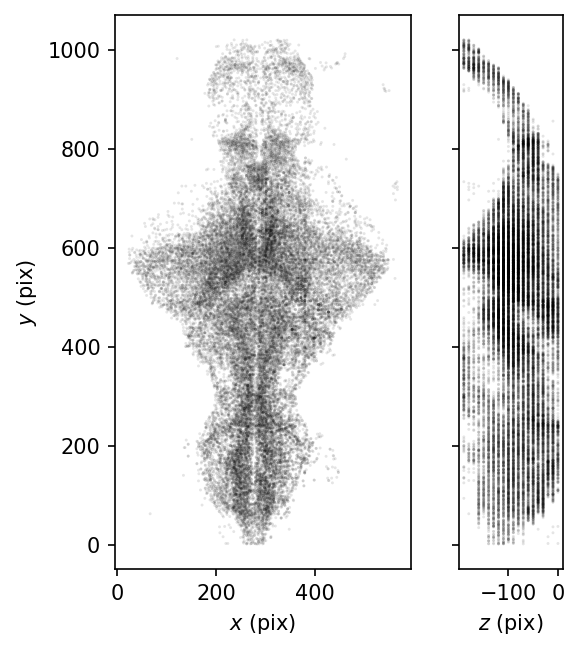

In [10]:
#projections on xy and yz planes
fig,axs=plt.subplots(1,2,dpi=150,sharey=True)
plt.subplots_adjust(wspace=-0.5)
s=2
c='k'
alpha=0.1

axs[0].scatter(brain_coordinates[0],brain_coordinates[1],s=s,c=c,alpha=alpha,edgecolors='none')

axs[0].set_aspect('equal')
axs[0].set_xlabel('$x$ (pix)')
axs[0].set_ylabel('$y$ (pix)')

axs[1].scatter(brain_coordinates[2],brain_coordinates[1],s=s,c=c,alpha=alpha,edgecolors='none')

axs[1].set_aspect('equal')
axs[1].set_xlabel('$z$ (pix)')

plt.show()

In [11]:
#ordered heights of the layers:
zs=np.unique(brain_coordinates[2])
zs=-np.sort(-zs)

In [12]:
#neurons layer by layer
alpha=1

def f(layer):
    plt.close()
    fig,ax=plt.subplots(dpi=150)
    x_coordinates_layer=brain_coordinates[0,brain_coordinates[2]==zs[layer]]
    y_coordinates_layer=brain_coordinates[1,brain_coordinates[2]==zs[layer]]
    ax.scatter(x_coordinates_layer,y_coordinates_layer,s=s,c=c,alpha=alpha,edgecolors='none')
    ax.set_aspect('equal')
    ax.set_xlim(np.min(brain_coordinates[0]),np.max(brain_coordinates[0]))
    ax.set_ylim(np.min(brain_coordinates[1]),np.max(brain_coordinates[1]))
    ax.set_xlabel('$x$ (pix)')
    ax.set_ylabel('$y$ (pix)')
    plt.show()

interact(f,layer=IntSlider(value=0,min=0,max=len(zs)-1,step=1));

interactive(children=(IntSlider(value=0, description='layer', max=19), Output()), _dom_classes=('widget-intera…

In [13]:
brain_fluorescence.shape

(30971, 960)

In [14]:
#fluorescence trace for every neuron
def f(neuron):
    plt.close()
    fig,ax=plt.subplots(dpi=150)
    ax.plot(brain_times,brain_fluorescence[neuron])
    ax.set_xlim(brain_times[0],brain_times[-1])
    ax.set_xlabel('time (s)')
    ax.set_ylabel('$\Delta F/F$')
    plt.show()

interact(f,neuron=IntSlider(value=0,min=0,max=len(brain_fluorescence)-1,step=1));

interactive(children=(IntSlider(value=0, description='neuron', max=30970), Output()), _dom_classes=('widget-in…

Visualize stimulus data:

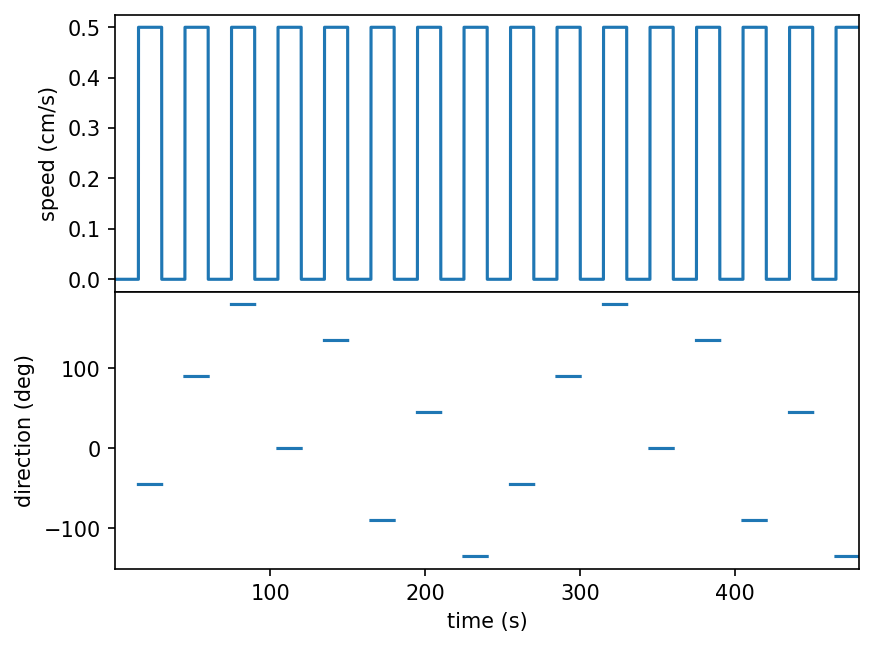

In [15]:
fig,axs=plt.subplots(2,1,dpi=150,sharex=True)
plt.subplots_adjust(hspace=0)

axs[0].plot(stimulus_times,stimulus_speed)
axs[0].set_xlim(stimulus_times[0],stimulus_times[-1])
axs[0].set_ylabel('speed (cm/s)')

axs[1].plot(stimulus_times,stimulus_direction)
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('direction (deg)')

plt.show()

Visualize tail data:

In [16]:
tail_coordinates.shape

(72213, 11, 2)

In [17]:
t0=33
i0=np.argmin(np.abs(tail_times-t0))

def f(i):
    plt.close()
    print('time = '+str(np.round(tail_times[i],3))+' s')
    fig,ax=plt.subplots(dpi=150)
    ax.plot(tail_coordinates[i,:,0],tail_coordinates[i,:,1],'k.-')
    ax.set_aspect('equal')
    ax.set_xlim(np.nanmin(tail_coordinates[:,:,0]),np.nanmax(tail_coordinates[:,:,0]))
    ax.set_ylim(np.nanmin(tail_coordinates[:,:,1]),np.nanmax(tail_coordinates[:,:,1]))
    plt.show()

interact(f,i=IntSlider(value=i0,min=0,max=len(tail_coordinates)-1,step=1));

interactive(children=(IntSlider(value=4964, description='i', max=72212), Output()), _dom_classes=('widget-inte…

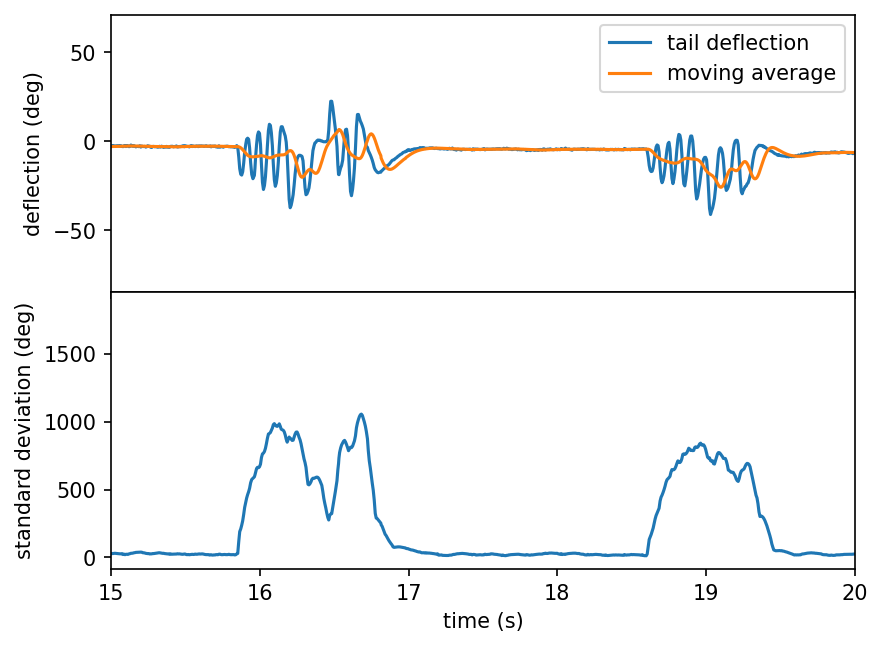

In [18]:
t1=15 #tail_times[0]
t2=20 #tail_times[-1]

fig,axs=plt.subplots(2,1,dpi=150,sharex=True)
plt.subplots_adjust(hspace=0)

axs[0].plot(tail_times,tail_deflection,label='tail deflection')
axs[0].plot(tail_times,tail_deflection_mean,label='moving average')
axs[0].set_xlim(t1,t2)
axs[0].set_ylabel('deflection (deg)')
axs[0].legend()

axs[1].plot(tail_times,tail_deflection_std)
axs[1].set_xlabel('time (s)')
axs[1].set_ylabel('standard deviation (deg)')

plt.show()